In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xarray as xr

In [2]:
ds = xr.open_dataset('ERAInterim__Profiles__Pattern.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:                            (pattern: 4, pressure: 37)
Coordinates:
  * pattern                            (pattern) object 'Fish' ... 'Flower'
  * pressure                           (pressure) float32 1.0 2.0 ... 1000.0
Data variables:
    Temperature_isobaric               (pattern, pressure) float32 ...
    Temperature_isobaric_median        (pressure) float32 ...
    Specific_humidity_isobaric         (pattern, pressure) float32 ...
    Specific_humidity_isobaric_median  (pressure) float32 ...
    Cloud_cover_isobaric               (pattern, pressure) float32 ...
    Cloud_cover_isobaric_median        (pressure) float32 ...
    Vertical_velocity_isobaric         (pattern, pressure) float32 ...
    Vertical_velocity_isobaric_median  (pressure) float32 ...

In [6]:
df = pd.read_json('ERAInterim_Profiles_Human.json')

In [7]:
variables = ['Cloud_cover_isobaric', 'Temperature_isobaric', 'Vertical_velocity_isobaric',
             'Specific_humidity_isobaric', 'Relative_humidity_isobaric']
height = np.array([1, 2, 3, 5, 7, 10, 20, 30, 50, 70, 100, 125, 150, 175, 200, 225, 
    250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 775, 800, 825, 
    850, 875, 900, 925, 950, 975, 1000])

In [8]:
len(height)

37

In [9]:
df.head()

,Cloud_cover_isobaric,Relative_humidity_isobaric,Specific_humidity_isobaric,Temperature_isobaric,Vertical_velocity_isobaric,center,pattern,time,season,center_lat,center_lon,ocean,climate,region
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0001869133, 0.0002120092, 0.0015507896, 0.0...","[3.9461e-06, 3.7491000000000002e-06, 3.3564e-0...","[266.06552, 272.27972, 254.86006, 240.38751, 2...","[-0.0004753671, -0.00028816080000000003, -0.00...","[-8.4303073624, 232.1083849452]",Fish,1478227500000,SON,-8.430307,232.108385,True,tropical,None
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00019811900000000002, 0.0002577856, 0.00126...","[3.9250000000000005e-06, 3.7175e-06, 3.4026000...","[265.0665, 269.6303, 257.1374, 239.1961, 232.2...","[-0.0003916225, -0.0005576930000000001, -0.000...","[-3.6418870622, 231.6081467365]",Fish,1478227500000,SON,-3.641887,231.608147,True,tropical,None
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0001819065, 0.00027876640000000004, 0.00112...","[3.9784e-06, 3.7236000000000002e-06, 3.4074e-0...","[266.11728, 268.6059, 258.11102, 239.21173, 23...","[-0.0002120934, -0.0008108935, -0.000605799300...","[-5.6283059328, 226.8108623154]",Flower,1478227620000,SON,-5.628306,226.810862,True,tropical,None
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0002044705, 0.0006670513, 0.002082207, 0.00...","[3.867e-06, 3.4710000000000003e-06, 3.3063e-06...","[264.84137, 258.11133, 250.99171, 241.61363, 2...","[1.49126e-05, 0.0001728013, 0.0005659684000000...","[18.1708363117, 317.6388756551]",Flower,1464129300000,MAM,18.170836,317.638876,True,tropical,1_Barbados
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.000200179, 0.0009569683, 0.0018456958000000...","[3.8682000000000005e-06, 3.4357e-06, 3.2755000...","[265.01813, 254.57616, 251.22365, 244.41588, 2...","[0.0001646394, -0.00033753360000000004, -0.000...","[18.2158684775, 303.9823725584]",Gravel,1464129540000,MAM,18.215868,303.982373,True,tropical,1_Barbados


In [10]:
hgt_idx=np.where(height%50==0)[0]

In [11]:
from pyclouds.imports import l2c, classes

In [12]:
l2c

{'Sugar': array([0.94509804, 0.95686275, 0.25882353]),
 'Flower': array([0.95686275, 0.25490196, 0.25490196]),
 'Fish': array([0.25490196, 0.94509804, 0.95686275]),
 'Gravel': array([0.28627451, 0.95686275, 0.25490196])}

Ocean: True
Total number labels: 7554
22% (1688) Fish
20% (1498) Flower
23% (1736) Gravel
35% (2632) Sugar


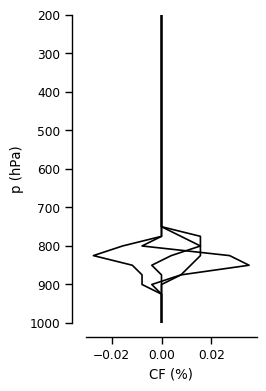

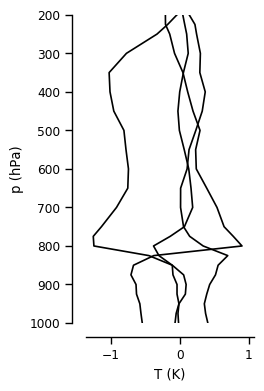

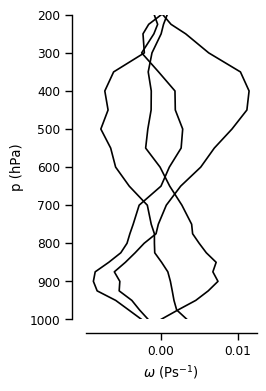

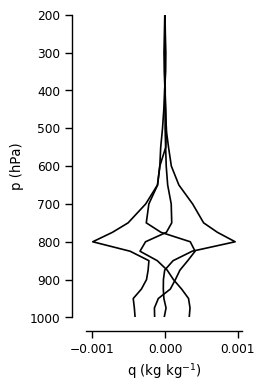

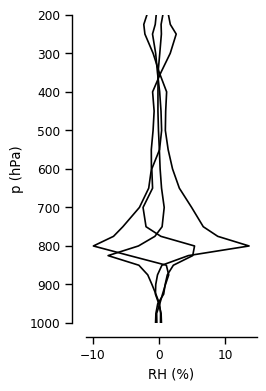

In [13]:
# Drop land or ocean domains
# Only the center of the domain is evaluated!
profile_type = 0 # 0: differences, 1: absolute
pattern_style = {'Fish':{'color': '#93D2E2'}, 'Sugar':{'color':'#A1D791'}, 'Gravel': {'color':'#3EAE47'}, 'Flower':{'color':'#2281BB'}}
variable_style = {'Cloud_cover_isobaric': {'title':'cloud fraction', 'xlabel':'CF (%)', 'ylim':(1010,490), 'xlim':(0,0.3)},
                  'Temperature_isobaric': {'title':'temperature', 'xlabel':'T (K)', 'ylim':(1010,490), 'xlim':(260,300)},
                  'Vertical_velocity_isobaric': {'title':'vertical velocity', 'xlabel':'$\omega$ (Ps$^{-1}$)', 'ylim':(1010,490), 'xlim':(-0.01,0.1)},
                  'Specific_humidity_isobaric': {'title':'spec. hum.', 'xlabel':'q (kg kg$^{-1}$)', 'ylim':(1010,490), 'xlim':(0,0.017)},
                  'Relative_humidity_isobaric': {'title':'rel. hum.', 'xlabel':'RH (%)', 'ylim':(1010,490), 'xlim':(0,90)}}
medianprops = {'linestyle':'', 'linewidth':0}
for surface_prop, sfc_grp in df.groupby('ocean'):
    if surface_prop == True:
#         for season, season_grp in sfc_grp.groupby('season'):
#             print(season)
        print('Ocean: {}'.format(surface_prop))
        print('Total number labels: {}'.format(len(sfc_grp)))
        sns.set_context('paper')
        for v, variable in enumerate(variables):
            plt.figure(figsize=(8.27/3,4),dpi=100)
            #plt.title(variable_style[variable]['title'])
            for p,(pattern, pattern_grp) in enumerate(sfc_grp.groupby('pattern')):
                if v == 0:
                    print('{:02.0f}% ({}) {}'.format(len(pattern_grp[variable])/len(sfc_grp)*100,len(pattern_grp[variable]),pattern))
                if profile_type == 0:
                    plt.plot(np.median(np.vstack(pattern_grp[variable]),axis=0)-np.median(np.vstack(df[variable]),axis=0), height, 
                             label=pattern, color=np.array(l2c[pattern])/255.)
                elif profile_type == 1:
                    plt.plot(np.median(np.vstack(pattern_grp[variable]),axis=0), height, label=pattern, color=pattern_style[pattern]['color'])
                    r=plt.boxplot(np.vstack(pattern_grp[variable])[:,hgt_idx],
                                  showbox=False,showmeans=False,
                                  meanline=False,showfliers=False,
                                  showcaps=True,whis=[25,75],
                                  medianprops=medianprops,
                                  whiskerprops={'color':'black','linewidth':0.3,'zorder':1},#pattern_style[pattern]['color']},
                                  positions=height[hgt_idx]+p*0,
                                  capprops={'color':pattern_style[pattern]['color']},
                                  vert=False,zorder=10)
                    for w,whisker in enumerate(r['whiskers']):
                        if w%2 == 1:
                            whisker.set_xdata([right_whisker_bounds[0], whisker.get_xdata()[1]])
                        elif w%2 == 0:
                            right_whisker_bounds = whisker.get_xdata()
                    for cap in r['caps']:
                        cap.set_ydata(cap.get_ydata() + np.array([-5,5]))
#             plt.legend(frameon=False)
            plt.gca().invert_yaxis()
            plt.ylabel('p (hPa)')
            plt.xlabel(variable_style[variable]['xlabel'])
#             plt.xlim(variable_style[variable]['xlim'])
            plt.ylim(1000, 200)
            plt.gca().yaxis.set_ticks(np.arange(200,1001,100))
            plt.gca().yaxis.set_ticklabels(np.arange(200,1001,100))
            sns.despine(offset=10)
            plt.tight_layout()
#             plt.savefig('MeteorologyProfile_ERAInt_ResnetLabel_{}_ValidationHuman.pdf'.format(variable),bbox_inches='tight')

Ocean: True
Total number labels: 7554
22% (1688) Fish
20% (1498) Flower
23% (1736) Gravel
35% (2632) Sugar


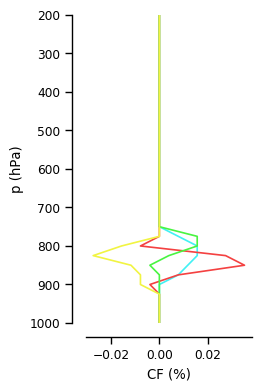

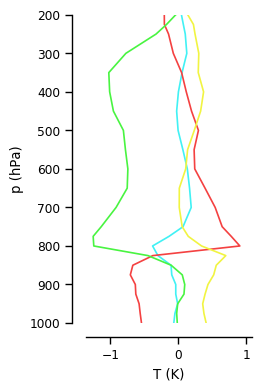

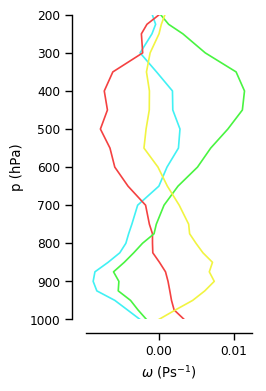

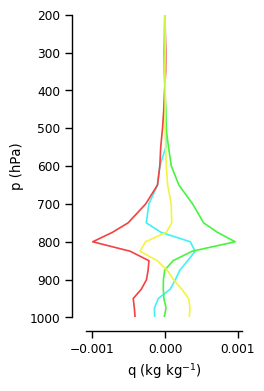

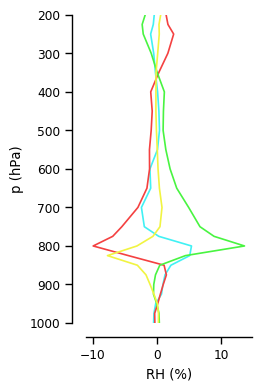

In [45]:
# Drop land or ocean domains
# Only the center of the domain is evaluated!
profile_type = 0 # 0: differences, 1: absolute
pattern_style = {'Fish':{'color': '#93D2E2'}, 'Sugar':{'color':'#A1D791'}, 'Gravel': {'color':'#3EAE47'}, 'Flower':{'color':'#2281BB'}}
variable_style = {'Cloud_cover_isobaric': {'title':'cloud fraction', 'xlabel':'CF (%)', 'ylim':(1010,490), 'xlim':(0,0.3)},
                  'Temperature_isobaric': {'title':'temperature', 'xlabel':'T (K)', 'ylim':(1010,490), 'xlim':(260,300)},
                  'Vertical_velocity_isobaric': {'title':'vertical velocity', 'xlabel':'$\omega$ (Ps$^{-1}$)', 'ylim':(1010,490), 'xlim':(-0.01,0.1)},
                  'Specific_humidity_isobaric': {'title':'spec. hum.', 'xlabel':'q (kg kg$^{-1}$)', 'ylim':(1010,490), 'xlim':(0,0.017)},
                  'Relative_humidity_isobaric': {'title':'rel. hum.', 'xlabel':'RH (%)', 'ylim':(1010,490), 'xlim':(0,90)}}
medianprops = {'linestyle':'', 'linewidth':0}
for surface_prop, sfc_grp in df.groupby('ocean'):
    if surface_prop == True:
#         for season, season_grp in sfc_grp.groupby('season'):
#             print(season)
        print('Ocean: {}'.format(surface_prop))
        print('Total number labels: {}'.format(len(sfc_grp)))
        sns.set_context('paper')
        for v, variable in enumerate(variables):
            plt.figure(figsize=(8.27/3,4),dpi=100)
            #plt.title(variable_style[variable]['title'])
            for p,(pattern, pattern_grp) in enumerate(sfc_grp.groupby('pattern')):
                if v == 0:
                    print('{:02.0f}% ({}) {}'.format(len(pattern_grp[variable])/len(sfc_grp)*100,len(pattern_grp[variable]),pattern))
                if profile_type == 0:
                    plt.plot(np.median(np.vstack(pattern_grp[variable]),axis=0)-np.median(np.vstack(df[variable]),axis=0), height, 
                             label=pattern, color=np.array(l2c[pattern])/255.)
                elif profile_type == 1:
                    plt.plot(np.median(np.vstack(pattern_grp[variable]),axis=0), height, label=pattern, color=pattern_style[pattern]['color'])
                    r=plt.boxplot(np.vstack(pattern_grp[variable])[:,hgt_idx],
                                  showbox=False,showmeans=False,
                                  meanline=False,showfliers=False,
                                  showcaps=True,whis=[25,75],
                                  medianprops=medianprops,
                                  whiskerprops={'color':'black','linewidth':0.3,'zorder':1},#pattern_style[pattern]['color']},
                                  positions=height[hgt_idx]+p*0,
                                  capprops={'color':pattern_style[pattern]['color']},
                                  vert=False,zorder=10)
                    for w,whisker in enumerate(r['whiskers']):
                        if w%2 == 1:
                            whisker.set_xdata([right_whisker_bounds[0], whisker.get_xdata()[1]])
                        elif w%2 == 0:
                            right_whisker_bounds = whisker.get_xdata()
                    for cap in r['caps']:
                        cap.set_ydata(cap.get_ydata() + np.array([-5,5]))
#             plt.legend(frameon=False)
            plt.gca().invert_yaxis()
            plt.ylabel('p (hPa)')
            plt.xlabel(variable_style[variable]['xlabel'])
#             plt.xlim(variable_style[variable]['xlim'])
            plt.ylim(1000, 200)
            plt.gca().yaxis.set_ticks(np.arange(200,1001,100))
            plt.gca().yaxis.set_ticklabels(np.arange(200,1001,100))
            sns.despine(offset=10)
            plt.tight_layout()
#             plt.savefig('MeteorologyProfile_ERAInt_ResnetLabel_{}_ValidationHuman.pdf'.format(variable),bbox_inches='tight')

In [14]:
sns.set_style('ticks')
sns.set_context('talk')
plt.rc('figure', figsize=(10, 6))
plt.rc("axes.spines", top=False, right=False)

In [15]:
variables = ['Temperature_isobaric', 'Specific_humidity_isobaric', 'Vertical_velocity_isobaric',
             'Cloud_cover_isobaric']
titles = ['Temperature', 'Specific humidity', 'Vertical velocity', 'Cloud cover']
xlabels = ['K', 'g/kg', 'hPa/d', '%']
factor = [1., 1000, 60*60*24/100, 1]

In [16]:
abcd = ['a', 'b', 'c', 'd']
xl = [1.5, 1.5, 10]

In [17]:
ds

<xarray.Dataset>
Dimensions:                            (pattern: 4, pressure: 37)
Coordinates:
  * pattern                            (pattern) object 'Fish' ... 'Flower'
  * pressure                           (pressure) float32 1.0 2.0 ... 1000.0
Data variables:
    Temperature_isobaric               (pattern, pressure) float32 ...
    Temperature_isobaric_median        (pressure) float32 ...
    Specific_humidity_isobaric         (pattern, pressure) float32 ...
    Specific_humidity_isobaric_median  (pressure) float32 ...
    Cloud_cover_isobaric               (pattern, pressure) float32 ...
    Cloud_cover_isobaric_median        (pressure) float32 ...
    Vertical_velocity_isobaric         (pattern, pressure) float32 ...
    Vertical_velocity_isobaric_median  (pressure) float32 ...

In [18]:
styles = ['-', '-.', '--', ':']

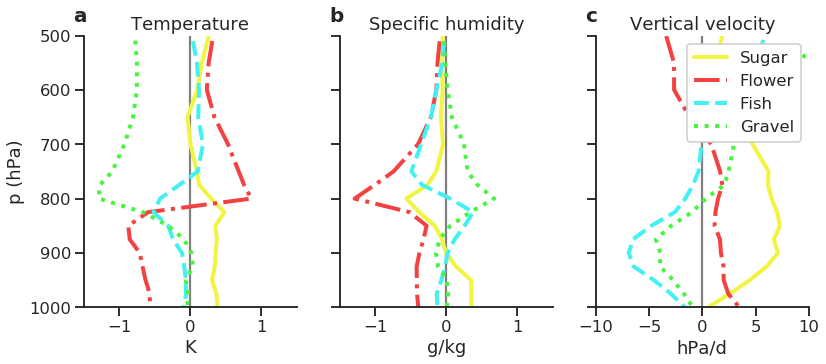

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(13,5))
for i, (ax, variable) in enumerate(zip(axs, variables)):
    for l, st in zip(classes, styles):
        #arr = np.vstack( df[df.pattern==l][variable]) - np.median(np.vstack(df[variable]), 0)
        arr = np.vstack( df[df.pattern==l][variable]) - ds[f'{variable}_median'].values
        arr *= factor[i]
        ax.plot(np.median(arr, 0), height,  c=np.array(l2c[l]), label=l, lw=4, ls=st)
#         ax.fill_betweenx(height, np.percentile(arr, 25, 0), np.percentile(arr, 75, 0), 
#                          facecolor=np.array(l2c[l])/255., zorder=0.1, alpha = 0.3, lw=3, color=np.array(l2c[l])/255.)
        
    ax.invert_yaxis() 
    ax.set_ylim(1000, 500)
    ax.set_title(titles[i])
    if variable == variables[0]:
        ax.set_ylabel('p (hPa)')
    else:
        ax.set_yticklabels([])
    ax.text(-0.05, 1.05, abcd[i], transform = ax.transAxes, weight='bold', fontsize=20)
    ax.set_xlabel(xlabels[i])
    ax.axvline(0, zorder=0.1, c='gray')
    ax.set_xlim(-xl[i], xl[i])
axs[-1].legend(loc=1, framealpha=1)
fig.savefig('phy.pdf', bbox_inches='tight', transparent=True)

In [32]:
variables = ['Temperature_isobaric', 'Relative_humidity_isobaric', 'Vertical_velocity_isobaric',
             'Cloud_cover_isobaric']
titles = ['Temperature', 'Relative humidity', 'Vertical velocity', 'Cloud cover']
xlabels = ['K', '%', 'hPa/d', '%']
factor = [1., 1, 60*60*24/100, 1]
xl = [1.5, 15, 10]

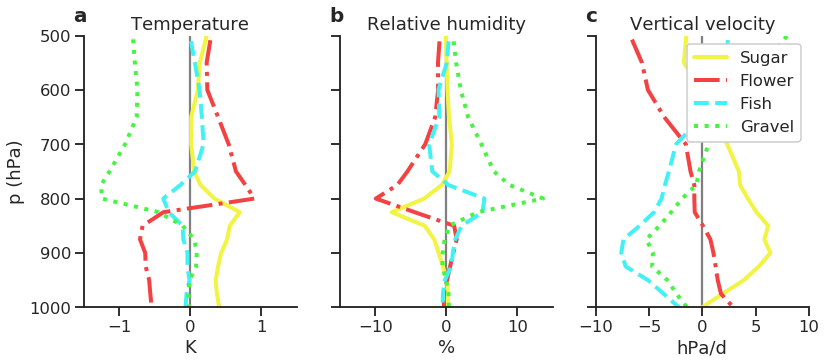

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(13,5))
for i, (ax, variable) in enumerate(zip(axs, variables)):
    for l, st in zip(classes, styles):
        arr = np.vstack( df[df.pattern==l][variable]) - np.median(np.vstack(df[variable]), 0)
        #arr = np.vstack( df[df.pattern==l][variable]) - ds[f'{variable}_median'].values
        arr *= factor[i]
        ax.plot(np.median(arr, 0), height,  c=np.array(l2c[l]), label=l, lw=4, ls=st)
#         ax.fill_betweenx(height, np.percentile(arr, 25, 0), np.percentile(arr, 75, 0), 
#                          facecolor=np.array(l2c[l])/255., zorder=0.1, alpha = 0.3, lw=3, color=np.array(l2c[l])/255.)
        
    ax.invert_yaxis() 
    ax.set_ylim(1000, 500)
    ax.set_title(titles[i])
    if variable == variables[0]:
        ax.set_ylabel('p (hPa)')
    else:
        ax.set_yticklabels([])
    ax.text(-0.05, 1.05, abcd[i], transform = ax.transAxes, weight='bold', fontsize=20)
    ax.set_xlabel(xlabels[i])
    ax.axvline(0, zorder=0.1, c='gray')
    ax.set_xlim(-xl[i], xl[i])
axs[-1].legend(loc=1, framealpha=1)
fig.savefig('phy2.pdf', bbox_inches='tight', transparent=True)

In [ ]:
arrs[0].shape

In [10]:
df[df.pattern=='Fish'].Cloud_cover_isobaric[0]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.015625,
 0.15625,
 0.0234375,
 0.0,
 0.0,
 0.0,
 0.0]